# Classification  Tree

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pointbiserialr
import statsmodels.api as sm
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_= sns.load_dataset("titanic")
from sklearn.preprocessing import StandardScaler

from IPython.display import display, Math
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, classification_report, make_scorer
)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df_.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df_.dropna(inplace=True)
X=df_.drop(['survived', 'alive'], axis=1)
y=df_[['survived']]

In [4]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
6,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,True
10,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,False
11,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,True


In [5]:
for i in X:
    X[i] = le.fit_transform(X[i])

In [6]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
1,0,0,32,1,0,57,0,0,2,0,2,0,0
3,0,0,28,1,0,44,2,0,2,0,2,2,0
6,0,1,49,0,0,41,2,0,1,1,4,2,1
10,2,0,4,1,1,10,2,2,0,0,6,2,0
11,0,0,53,0,0,17,2,0,2,0,2,2,1


In [7]:
y.head()

,survived
1,1
3,1
6,0
10,1
11,1


In [8]:
##X=X.drop('alive', axis=1)

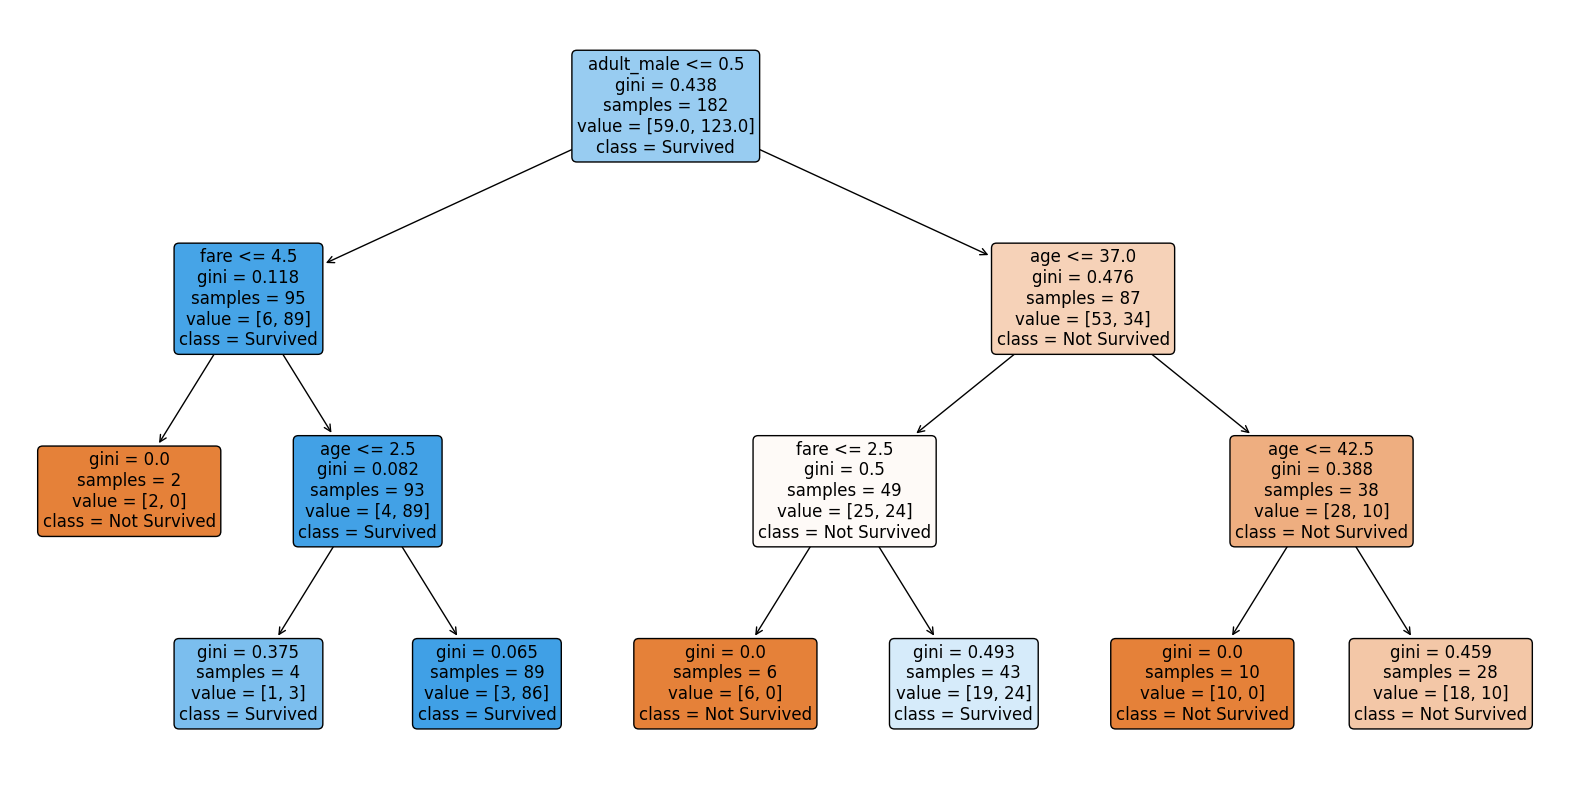

In [9]:
# Assuming X and y are already defined and preprocessed
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
tree_model_syn = DecisionTreeClassifier(max_depth=3, random_state=42, max_leaf_nodes=10)  # Limiting the depth to 3
tree_model_syn.fit(X, y)
feature_names = X.columns
class_names = ['Not Survived', 'Survived']
plt.figure(figsize=(20,10))
plot_tree(tree_model_syn, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=12)
plt.show()

$$ \huge G = 1 - \sum_{i=1}^{C} p(i)^2  $$

<div class="alert alert-warning">

### English
**What it measures:** Gini impurity calculates the probability of a random sample being classified incorrectly if it was randomly labeled according to the distribution of all the classes in the node.

**Condition:** `adult_male <= 0.5` This is the condition for splitting the data at this node of the tree.

**Gini Impurity:** `gini = 0.438` This value represents the Gini impurity of the node.

**Interpretation of Gini Values**
- **Gini = 0:** Perfect purity; all samples at the node belong to a single class.
- **Gini > 0:** There is a mixture of classes within the node. The higher the Gini impurity, the more mixed the classes are.
- **Gini = 0.5:** This is the maximum impurity in a binary classification; the classes are evenly split in the node.

**Conclusion**
Lower Gini impurity is better because it indicates that the node is more homogenous, i.e., most of the samples in the node are from the same class.

### Deutsch
**Was es misst:** Gini-Unreinheit berechnet die Wahrscheinlichkeit, dass eine zufällige Probe falsch klassifiziert wird, wenn sie zufällig gemäß der Verteilung aller Klassen im Knoten beschriftet wurde.

**Bedingung:** `adult_male <= 0.5` Dies ist die Bedingung für die Aufteilung der Daten an diesem Knoten des Baumes.

**Gini-Unreinheit:** `gini = 0.438` Dieser Wert repräsentiert die Gini-Unreinheit des Knotens.

**Interpretation der Gini-Werte**
- **Gini = 0:** Perfekte Reinheit; alle Proben am Knoten gehören zu einer einzigen Klasse.
- **Gini > 0:** Es gibt eine Mischung von Klassen innerhalb des Knotens. Je höher die Gini-Unreinheit, desto gemischter sind die Klassen.
- **Gini = 0.5:** Dies ist die maximale Unreinheit in einer binären Klassifikation; die Klassen sind im Knoten gleichmäßig aufgeteilt.

**Fazit**
Eine niedrigere Gini-Unreinheit ist besser, da sie darauf hinweist, dass der Knoten homogener ist, d.h., die meisten Proben im Knoten stammen aus derselben Klasse.

</div>



## Calculate the proportion of each class

In [10]:
non_survivors = 59.0
survivors = 123.0
total_samples = non_survivors + survivors
p_non_survivors = non_survivors / total_samples
p_survivors = survivors / total_samples
# Calculate the Gini impurity
gini = 1 - (p_non_survivors**2 + p_survivors**2)
print(f'The gini impurity score adult male column is { round(gini,3)} ')

The gini impurity score adult male column is 0.438 


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_pred = clf.predict(X_train)
test_scores = {
    'accuracy': accuracy_score(y_train, y_pred),
    'precision': precision_score(y_train, y_pred),
    'recall': recall_score(y_train, y_pred),
    'f1': f1_score(y_train, y_pred),
    'roc_auc': roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
}
print("\nTest Set Evaluation Metrics:")
for metric, score in test_scores.items():
    print(f"{metric.capitalize()}: {score:.4f}")


Test Set Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000
Roc_auc: 1.0000


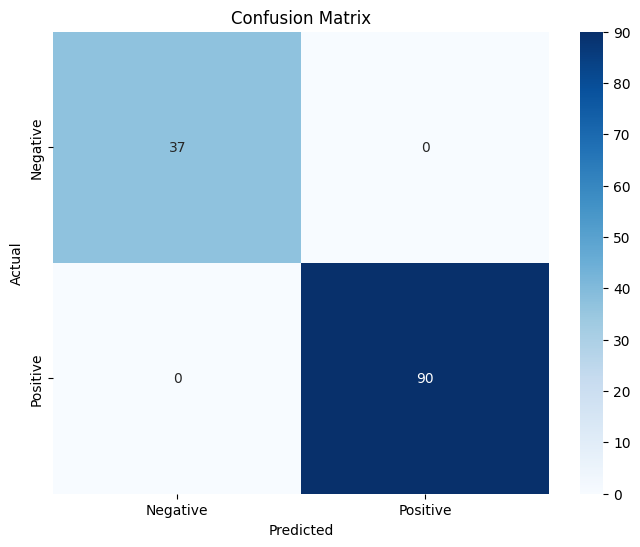

In [18]:
cm_pred_ = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pred_, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [17]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

## Decision Tree Parameters

### English

- **ccp_alpha:** Pruning parameter to control tree complexity.
- **class_weight:** Adjusts weights for class imbalance.
- **criterion:** Measure for node splitting (e.g., 'gini').
- **max_depth:** Maximum depth of the tree. Expands nodes until they contain fewer than min_samples_split samples if set to None.
- **max_features:** Limits the number of features for splitting nodes. Considers all features if None.
- **max_leaf_nodes:** Maximum number of leaf nodes in the tree.
- **min_impurity_decrease:** Minimum impurity decrease required for node splitting.
- **min_samples_leaf:** Minimum number of samples required in a leaf node.
- **min_samples_split:** Minimum number of samples required to split a node.
- **min_weight_fraction_leaf:** Minimum weighted fraction per leaf.
- **monotonic_cst:** Monotonic constraints on feature splits.
- **random_state:** Seed for reproducibility.
- **splitter:** Strategy for splitting ('best' or 'random').

### Deutsch

- **ccp_alpha:** Beschnitt-Parameter zur Kontrolle der Baumkomplexität.
- **class_weight:** Gewichtsanpassung für Klassenungleichgewichte.
- **criterion:** Maß für die Aufteilung von Knoten (z.B. 'gini').
- **max_depth:** Maximale Tiefe des Baumes. Knoten werden erweitert, bis sie weniger als min_samples_split Proben enthalten, falls auf None gesetzt.
- **max_features:** Begrenzt die Anzahl der Merkmale bei der Aufteilung von Knoten. Betrachtet alle Merkmale, falls None.
- **max_leaf_nodes:** Maximale Anzahl von Blattknoten im Baum.
- **min_impurity_decrease:** Minimale Unreinheitsabnahme, die für die Aufteilung eines Knotens erforderlich ist.
- **min_samples_leaf:** Mindestanzahl von Proben, die in einem Blattknoten erforderlich sind.
- **min_samples_split:** Mindestanzahl von Proben, die erforderlich sind, um einen Knoten aufzuteilen.
- **min_weight_fraction_leaf:** Minimale gewichtete Fraktion pro Blatt.
- **monotonic_cst:** Monotone Beschränkungen für die Aufteilung von Merkmalen.
- **random_state:** Samen für die Reproduzierbarkeit.
- **splitter:** Strategie für die Aufteilung ('best' oder 'random').


In [19]:
y_pred = clf.predict(X_test)
test_scores = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred),
    'roc_auc': roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
}
print("\nTest Set Evaluation Metrics:")
for metric, score in test_scores.items():
    print(f"{metric.capitalize()}: {score:.4f}")


Test Set Evaluation Metrics:
Accuracy: 0.6000
Precision: 0.6571
Recall: 0.6970
F1: 0.6765
Roc_auc: 0.5758


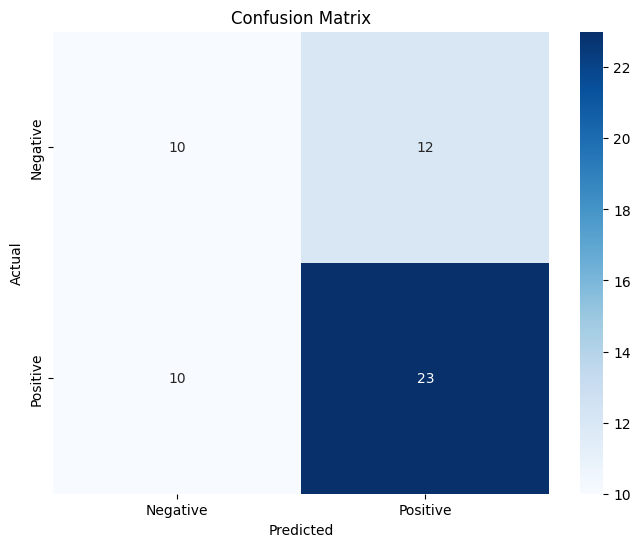

In [20]:
cm_pred_ = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pred_, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()